!-- hide -->
# Logistic regression - Step by step guide
<!-- endhide -->

- Understand a new dataset.
- Process it by applying exploratory data analysis (EDA).
- Model the data using logistic regression.
- Analyze the results and optimize the model.


## 🌱  How to start this project

Follow the instructions below:

1. Create a new repository based on [machine learning project](https://github.com/4GeeksAcademy/machine-learning-python-template/generate) by [clicking here](https://github.com/4GeeksAcademy/machine-learning-python-template).
2. Open the newly created repository in Codespace using the [Codespace button extension](https://docs.github.com/en/codespaces/developing-in-codespaces/creating-a-codespace-for-a-repository#creating-a-codespace-for-a-repository).
3. Once the Codespace VSCode has finished opening, start your project by following the instructions below.

## 🚛 How to deliver this project

Once you have finished solving the exercises, be sure to commit your changes, push to your repository and go to 4Geeks.com to upload the repository link.

## 📝 Instructions

### Banking Marketing Campaign

**Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

**Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

#### Step 1: Loading the dataset

The dataset can be found in this project folder under the name `bank-marketing-campaign-data.csv`. You can load it into the code directly from the link (`https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv`) or download it and add it by hand in your repository. In this dataset you will find the following variables:

1. `age`. Age of customer (numeric)
2. `job`. Type of job (categorical)
3. `marital`. Marital status (categorical)
4. `education`. Level of education (categorical)
5. `default`. do you currently have credit (categorical) 6. housing.
6. `housing`. do you have a housing loan (categorical) 7. loan.
7. `loan`. Do you have a personal loan? (categorical)
8. `contact`. Type of contact communication (categorical)
9. `month`. Last month in which you have been contacted (categorical)
10. `day_of_week`. Last day on which you have been contacted (categorical)
11. `duration`. Duration of previous contact in seconds (numeric)
12. `campaign`. Number of contacts made during this campaign to the customer (numeric)
13. `pdays`. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
14. `previous`. Number of contacts made during the previous campaign to the customer (numeric)
15. `poutcome`. Result of the previous marketing campaign (categorical).
16. `emp.var.rate`. Employment variation rate. Quarterly indicator (numeric)
17. `cons.price.idx`. Consumer price index. Monthly indicator (numeric)
18. `cons.conf.idx`. Consumer confidence index. Monthly indicator (numeric)
19. `euribor3m`. EURIBOR 3-month rate. Daily indicator (numeric)
20. `nr.employed`. Number of employees. Quarterly indicator (numeric)
21. `y`. TARGET. Whether the customer takes out a long-term deposit or not

#### Step 2: Perform a full EDA

This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into `train` and `test` as we have seen in previous lessons.

#### Step 3: Build a logistic regression model

You do not need to optimize the hyperparameters. Start by using a default definition and improve it in the next step.

#### Step 4: Optimize the previous model

After training the model, if the results are not satisfactory, optimize it using one of the techniques seen above.

> NOTE: Solution: https://github.com/4GeeksAcademy/logistic-regression-project-tutorial/blob/main/solution.ipynb

In [43]:
import pandas as pd
import numpy as np 
import wget
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, SplineTransformer
from sklearn.metrics import accuracy_score, r2_score
import statsmodels.api as sm
from patsy import dmatrices

pd.set_option('display.max_columns', None)

In [44]:
file_path = 'C:/Users/Rashid/Documents/my_projects/4geeks/Banking-marketing-campaign/Banking-Marketing-Campaign/data/raw/bank-marketing-campaign-data.csv'

df = pd.read_csv(file_path, delimiter=';')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [46]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [47]:
categorical_columns = df.select_dtypes(include=['object']).columns

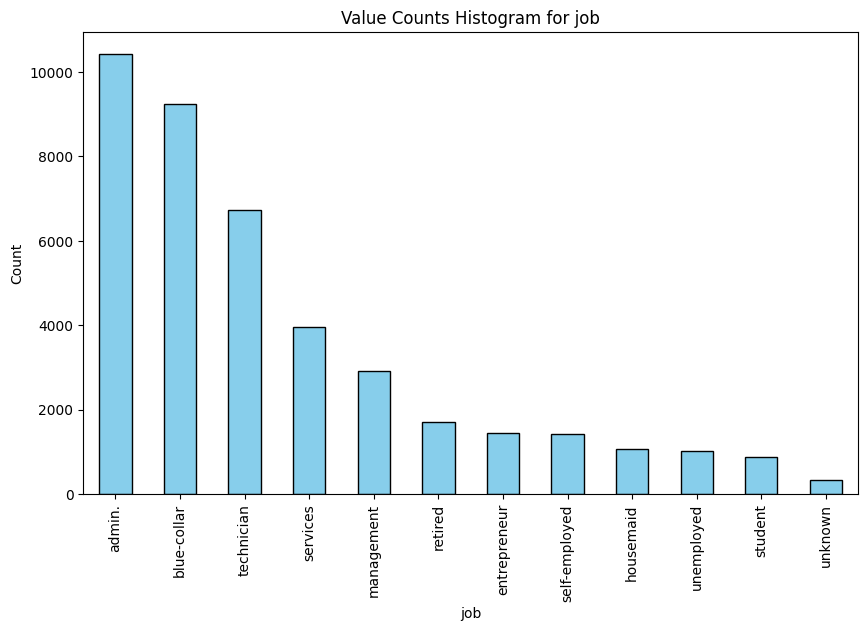

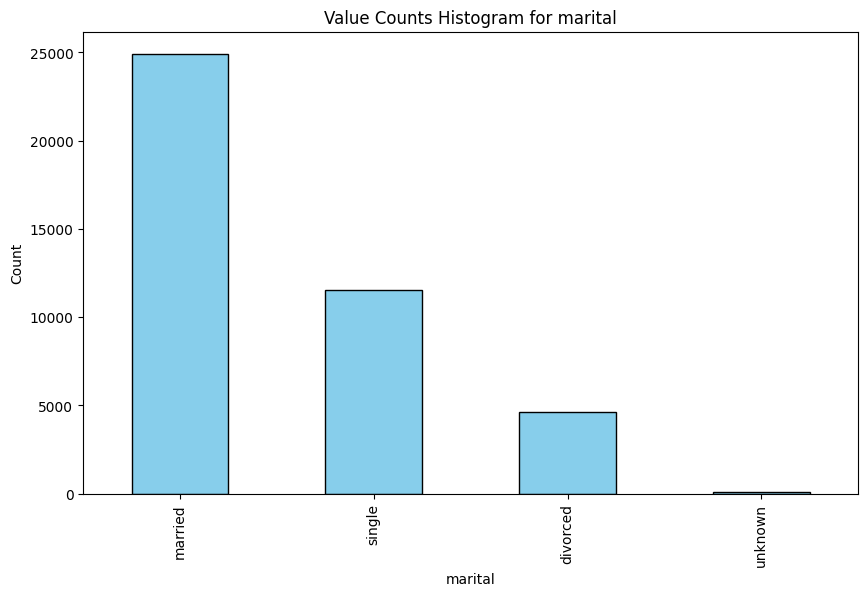

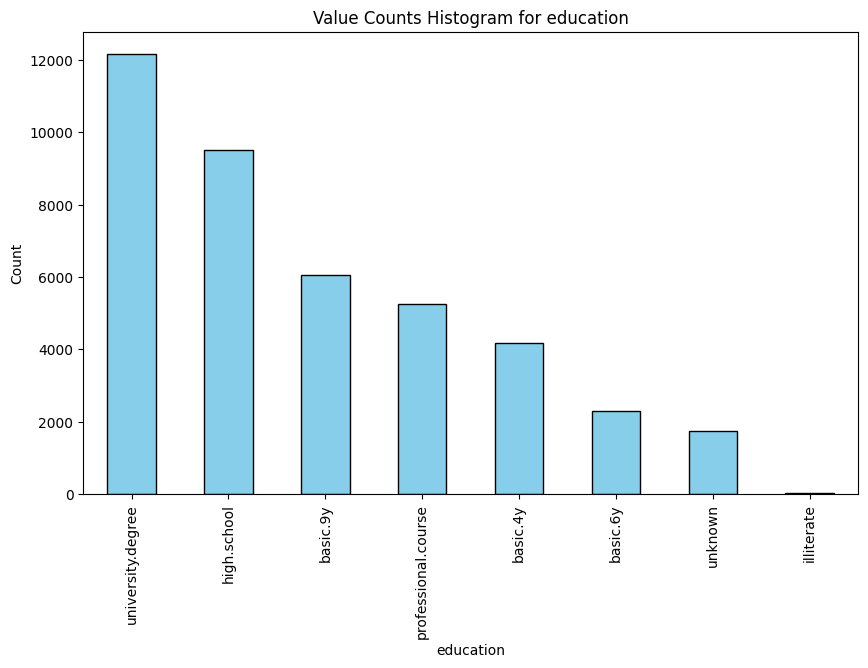

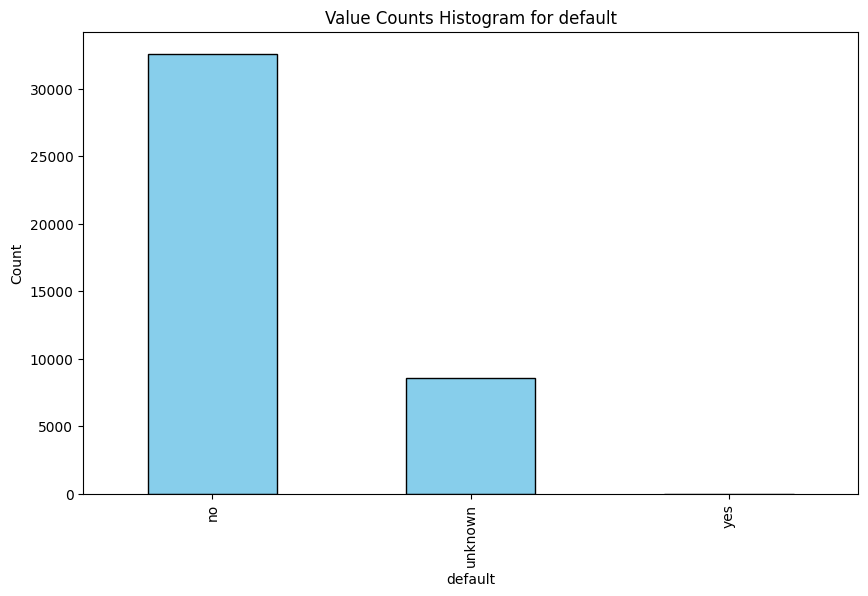

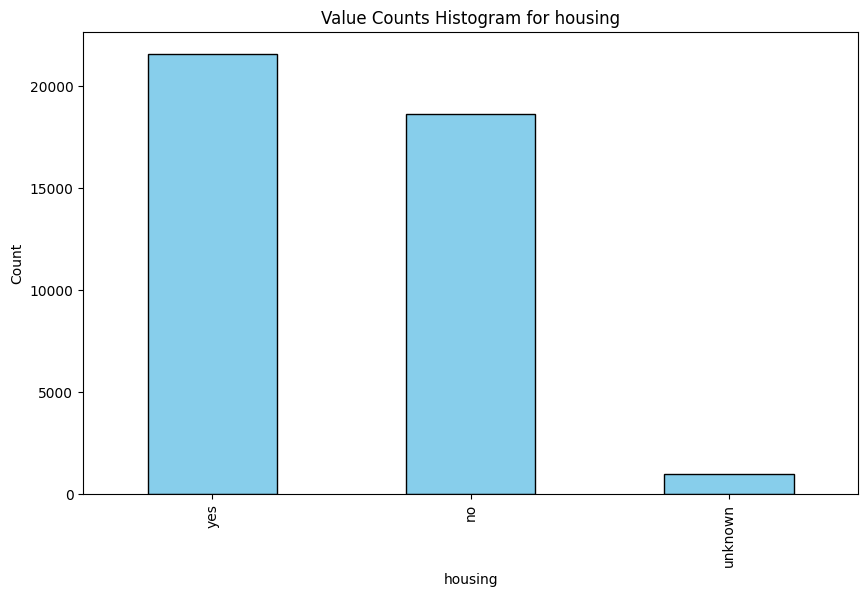

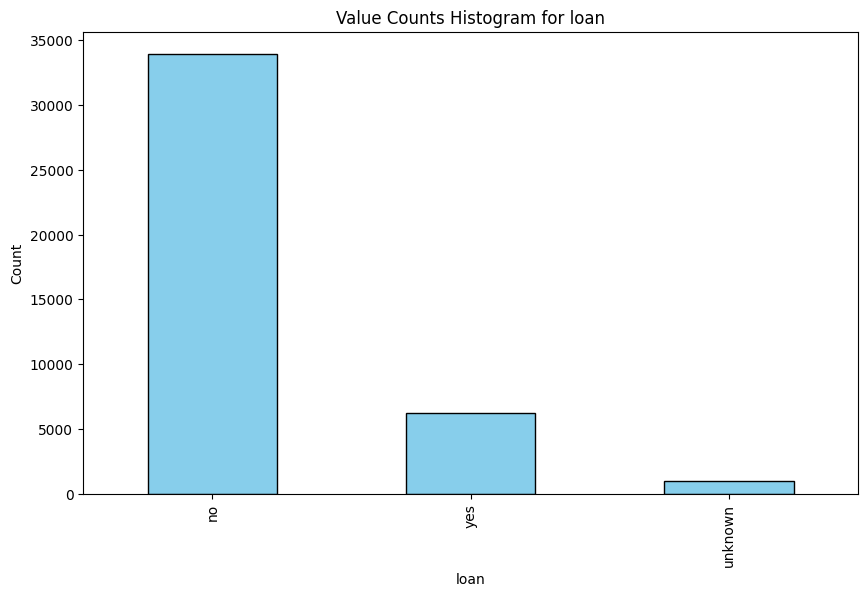

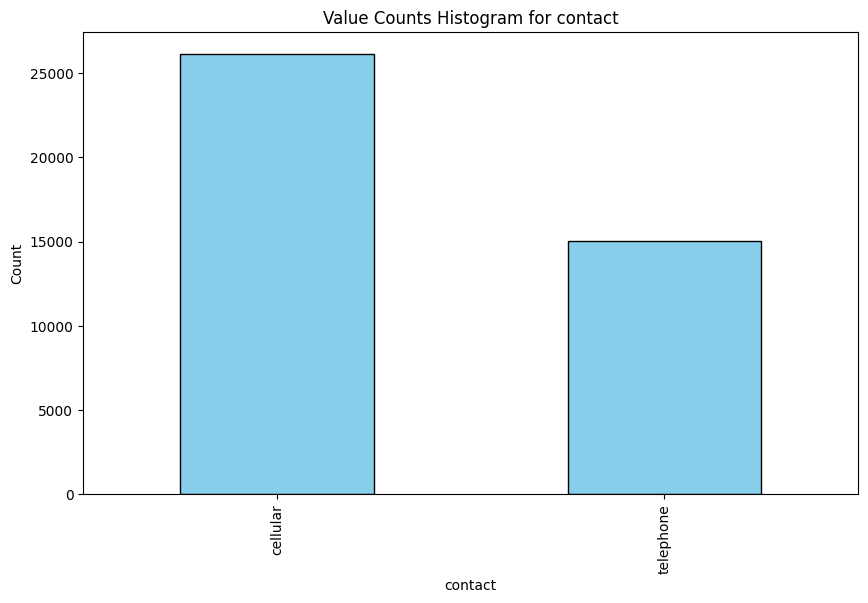

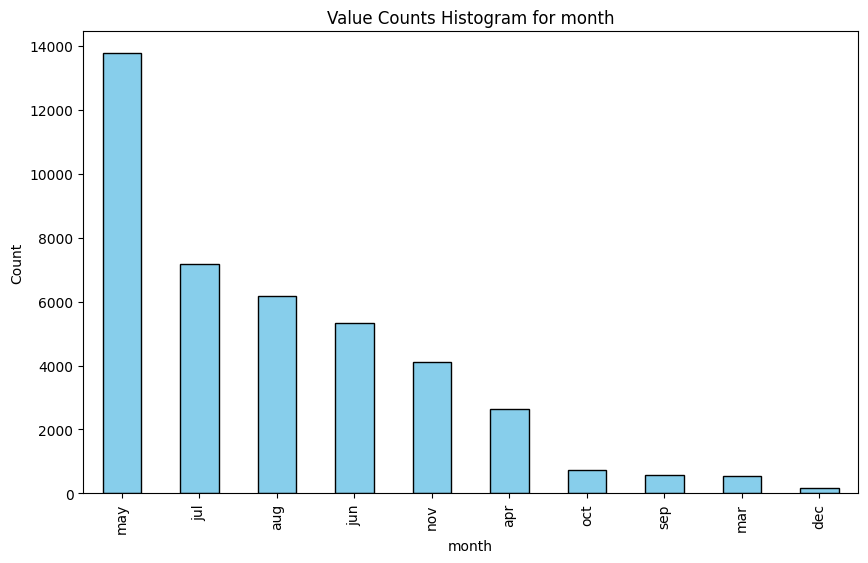

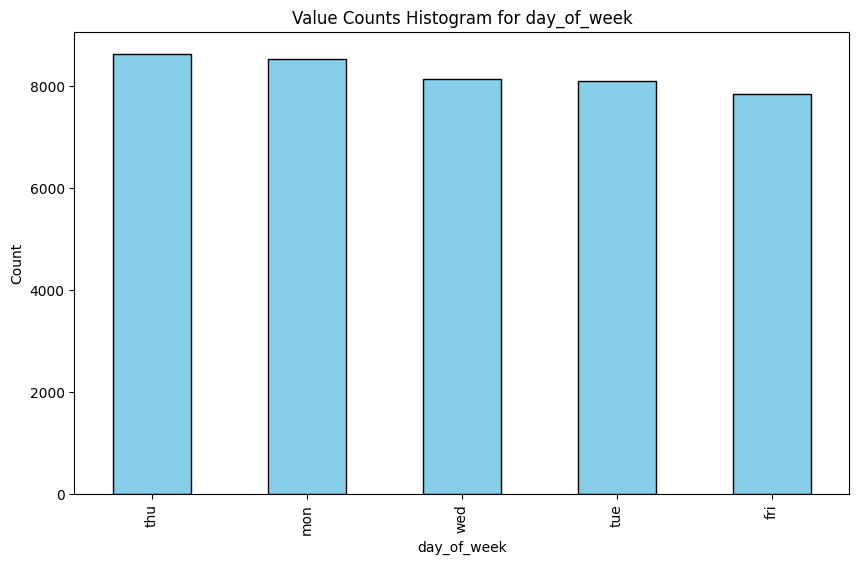

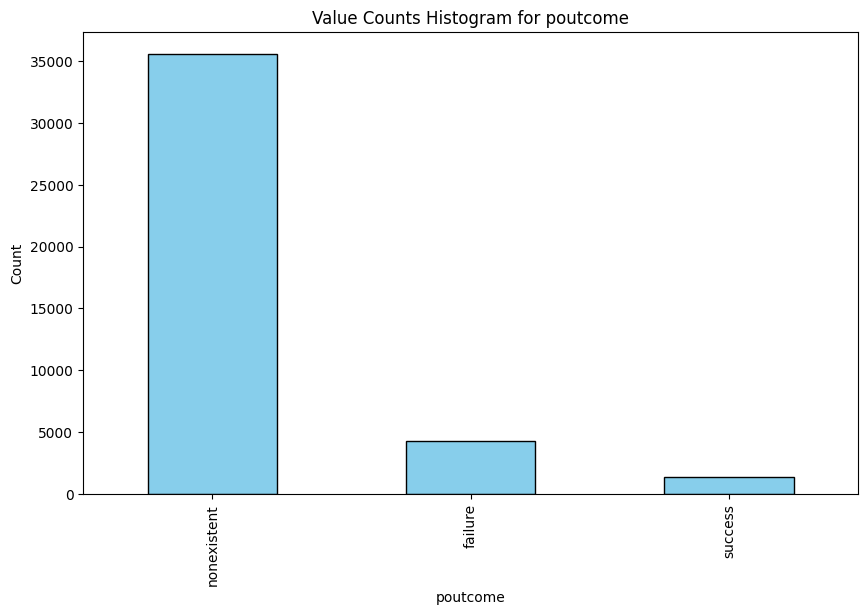

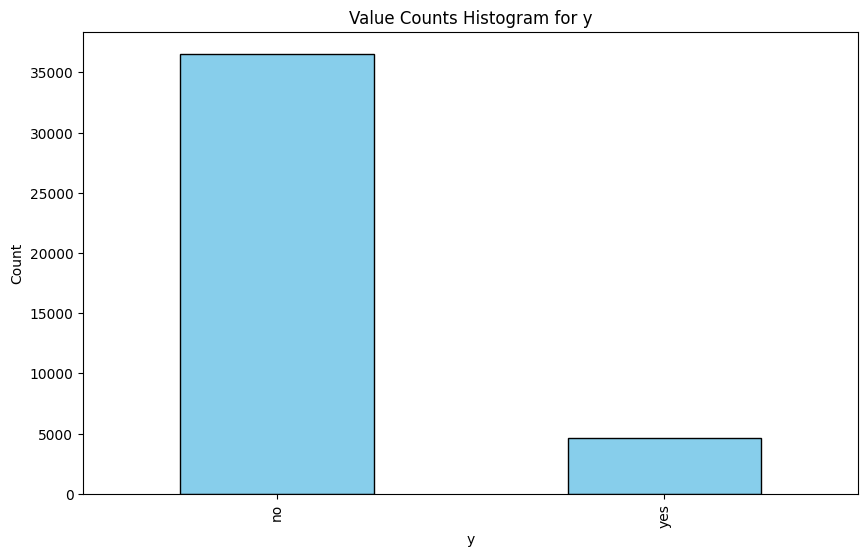

In [51]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Value Counts Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [52]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

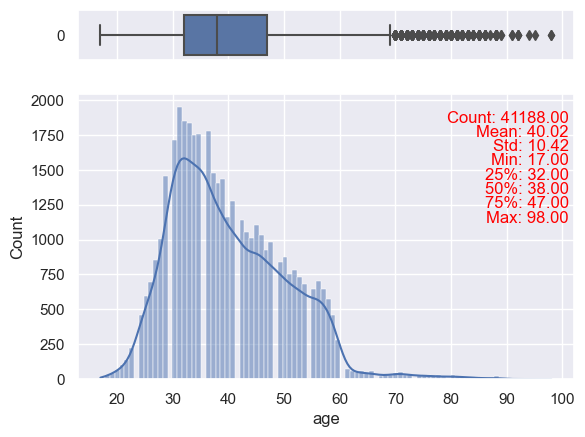

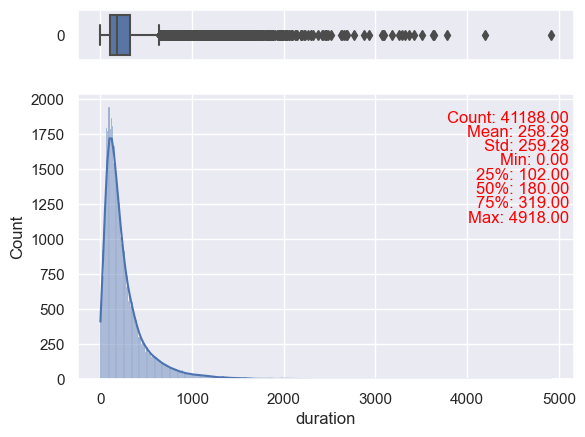

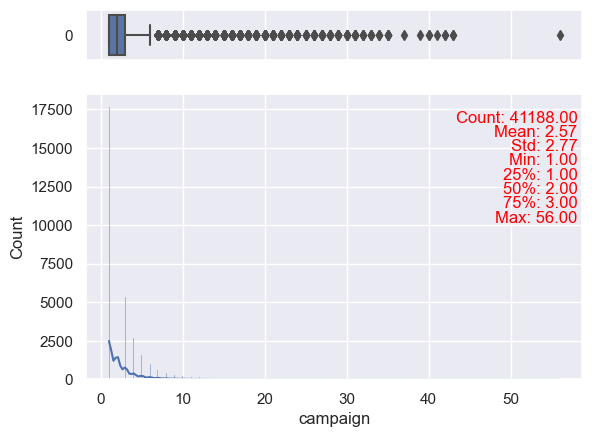

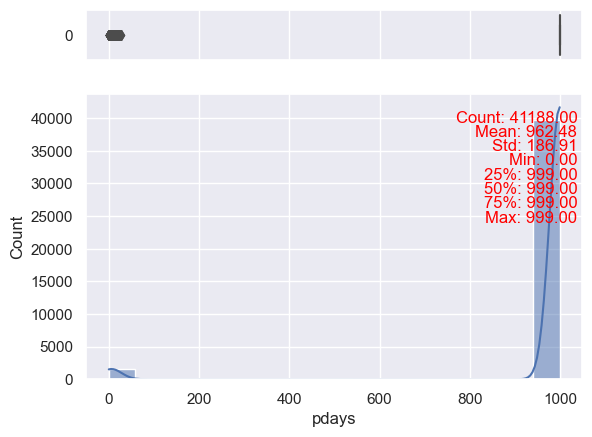

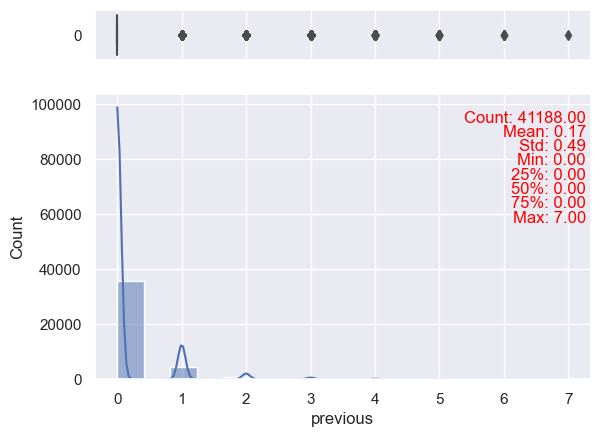

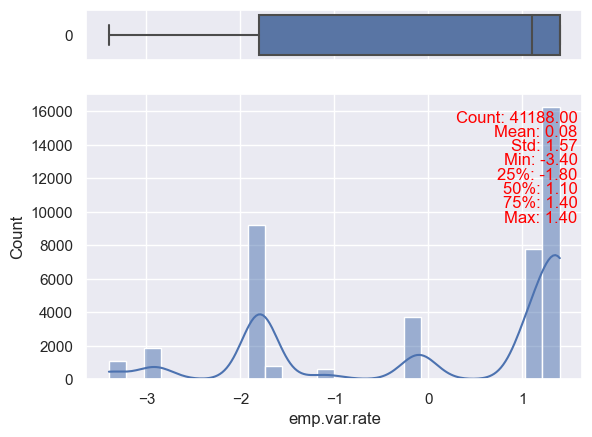

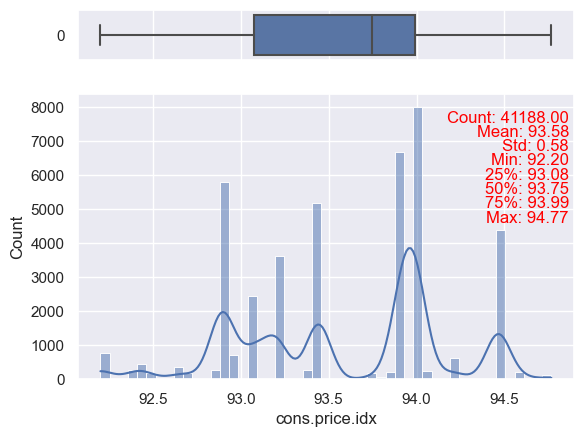

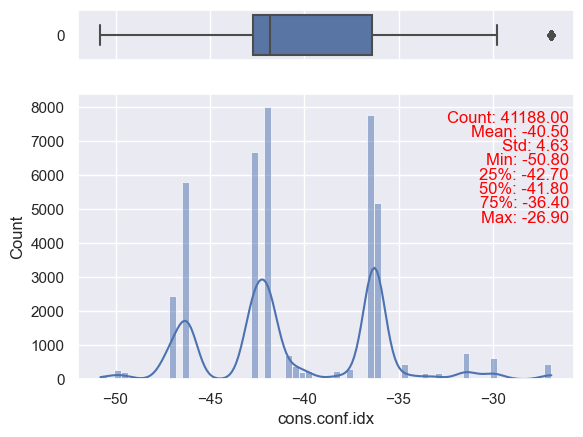

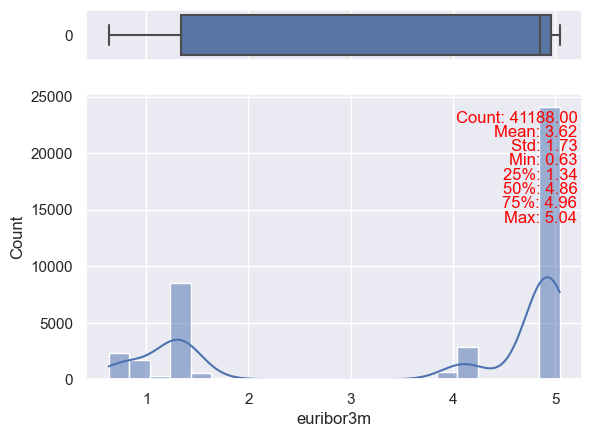

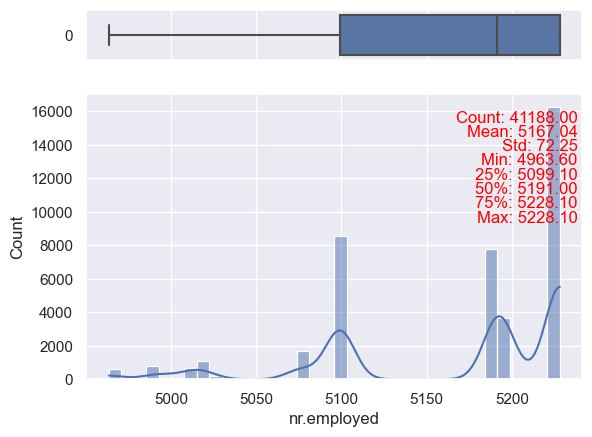

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=np.number).columns.tolist()

def plot_box_hist(data, columns_to_plot):
    sns.set(style="darkgrid")
    
    for col in columns_to_plot:
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        
        sns.boxplot(data[col], orient="h", ax=ax_box)
        sns.histplot(data=data, x=col, ax=ax_hist, kde=True) 
        
        stats = data[col].describe()
        for stat_name, stat_value in stats.items():
            ax_hist.text(0.99, 0.9 - 0.05 * stats.index.get_loc(stat_name), f"{stat_name.capitalize()}: {stat_value:.2f}", transform=ax_hist.transAxes, ha='right', color='red')
        
        ax_box.set(xlabel='')
        
        plt.show()


columns_to_plot = num_cols

plot_box_hist(df, columns_to_plot)


In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [55]:
df['log_duration'] = np.log(df['duration'] + 0.001)
df['sqrt_duration'] = np.sqrt(df['campaign'])
df['few_campaigns'] = np.where(df['campaign']<12, 1, 0)
df['alot_campaigns'] = np.where(df['campaign']>28, 1, 0)
df['pdays'] = np.where(df['pdays']<999, 1, 0)

In [ ]:
categorical_columns = categorical_columns.drop('y')
df[categorical_columns] = df[categorical_columns].drop(columns='y', errors='ignore')

In [56]:
df_yes = df.loc[df["y"]=='yes']
df_no = df.loc[df["y"]=='no'].sample(len(df_yes))
df_balanced = pd.concat([df_yes,df_no],axis=0)

In [57]:
df_balanced

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,log_duration,sqrt_duration,few_campaigns,alot_campaigns
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,7.362011,1.000000,1,0
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,6.948898,1.000000,1,0
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,7.290975,1.000000,1,0
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,6.361304,1.000000,1,0
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,6.133400,1.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23224,47,admin.,married,university.degree,no,unknown,unknown,cellular,aug,tue,225,2,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,5.416105,1.414214,1,0
19558,47,admin.,single,university.degree,no,yes,no,cellular,aug,thu,156,4,0,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no,5.049862,2.000000,1,0
16365,36,entrepreneur,married,university.degree,no,yes,no,cellular,jul,wed,40,8,0,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,3.688904,2.828427,1,0
6383,52,self-employed,married,basic.9y,unknown,yes,no,telephone,may,tue,90,4,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.499821,2.000000,1,0


In [66]:
X_num = df_balanced[num_cols]
X_cat = df_balanced[categorical_columns].drop(columns='y')

In [67]:
encoder = OneHotEncoder(max_categories=5, sparse_output=False, drop='first')
encoder.fit(X_cat)
X_dummies = encoder.transform(X_cat)

In [68]:
X = np.c_[X_num, X_dummies]
y = df_balanced['y'].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12345)

In [70]:
### My first model (Model 1)
model1 = LogisticRegression(penalty=None)
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
print(accuracy_score(y_pred_train,y_train))
y_pred_test = model1.predict(X_test)
print(accuracy_score(y_pred_test,y_test))

0.8561422413793104
0.8658405172413793


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=12345)

In [74]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
print(accuracy_score(y_pred_train,y_train))
y_pred_test = model2.predict(X_test)
print(accuracy_score(y_pred_test,y_test))

0.8665140086206896
0.8760775862068966
